# <span style="color:teal"> Deep Reinforcement Learning for</span> <span style="color:red">Atari Enduro-v0 </span>

### Import Required Packages

In [1]:
from time import sleep
from __future__ import division

import gym
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image

from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Flatten, Dropout, concatenate, Permute
from keras.layers import Input, Conv2D
from keras.optimizers import Adam
from keras.activations import relu, linear


from rl.agents.dqn import DQNAgent
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory
from rl.core import Processor

Using TensorFlow backend.


***
### Enduro-v0 Environment

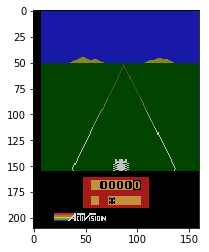

In [2]:
env = gym.make('Enduro-v0')

plt.imshow(env.render(mode='rgb_array'))

#### 1. *Number of possible action*

In [3]:
nb_actions = env.action_space.n
print('Total number of Possible actoin is :', nb_actions)

Total number of Possible actoin is : 9


#### 2. *Taking stack of 4 consecutive frames*

In [4]:
frame_shape = (84, 84)
window_length = 4
input_shape = (window_length,) + frame_shape
print('Input Shape is :', input_shape)

Input Shape is : (4, 84, 84)


***
### Defining class for pre-processing the game_frames

In [5]:
class GameProcess(Processor):
    def process_observation(self, observation):
        img = Image.fromarray(observation)
        img = np.array(img.resize(frame_shape).convert('L'))
        return img.astype('uint8')  

    def process_state_batch(self, batch):
        Processed_batch = batch.astype('float32') / 255.
        return Processed_batch

    def process_reward(self, reward):
        return np.clip(reward, -1., 1.)

***
## DeepMind Architecture

In [6]:
model = Sequential()

model.add(Permute((2, 3, 1), input_shape=input_shape))

model.add(Conv2D(32, (8, 8), strides=(4, 4)))
model.add(Activation('relu'))

model.add(Conv2D(64, (4, 4), strides=(2, 2)))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3), strides=(1, 1)))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(nb_actions))
model.add(Activation('linear'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
permute_1 (Permute)          (None, 84, 84, 4)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 32)        8224      
_________________________________________________________________
activation_1 (Activation)    (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          32832     
_________________________________________________________________
activation_2 (Activation)    (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
activation_3 (Activation)    (None, 7, 7, 64)          0         
__________

***
### Configuring the Agent

#### 1. *Allocating memory for experience replay*

In [7]:
memory = SequentialMemory(limit=1000000, window_length=window_length)

#### 2.* Policy: Epsilon Greedy Exploration*
<span style="color:teal">*Gradually exploration will be decreased*</span>

In [8]:
policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps', value_max=1., value_min=.1, value_test=.05, nb_steps=1000000)

#### 3. *Compiling DQN Agent*

In [9]:
dqn = DQNAgent(model=model, nb_actions=nb_actions, policy=policy, memory=memory, processor=GameProcess(),
               nb_steps_warmup=50000, gamma=.99, target_model_update=10000, train_interval=4, delta_clip=1.)

In [10]:
dqn.compile(Adam(lr=.00025), metrics=['mae'])

***
# <span style="color:red">**-  -  $ Caution^1 $   -  -**</span>

## <span style="color:teal"> Training the model </span>

#### 1. For 2M Steps

In [11]:
history2M = dqn.fit(env, nb_steps=2000000)

Training for 2000000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 48s - reward: 0.0000e+00    
2 episodes - episode_reward: 0.000 [0.000, 0.000] - ale.lives: 0.000

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 50s - reward: 0.0000e+00    - ETA: 0s - reward:  
2 episodes - episode_reward: 0.000 [0.000, 0.000] - ale.lives: 0.000

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 54s - reward: 0.0000e+00    - ETA: 0s - reward: 0.
2 episodes - episode_reward: 0.000 [0.000, 0.000] - ale.lives: 0.000

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 57s - reward: 0.0000e+00    
3 episodes - episode_reward: 0.000 [0.000, 0.000] - ale.lives: 0.000

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 50s - reward: 0.0000e+00    
2 episodes - episode_reward: 0.000 [0.000, 0.000] - ale.lives: 0.000

Interval 6 (50000 steps p

10000/10000 [==============================] - 201s - reward: 0.0000e+00   
2 episodes - episode_reward: 0.000 [0.000, 0.000] - loss: 0.000 - mean_absolute_error: 0.007 - mean_q: 0.008 - mean_eps: 0.699 - ale.lives: 0.000

Interval 35 (340000 steps performed)
10000/10000 [==============================] - 202s - reward: 0.0000e+00   
2 episodes - episode_reward: 0.000 [0.000, 0.000] - loss: 0.000 - mean_absolute_error: 0.007 - mean_q: 0.008 - mean_eps: 0.690 - ale.lives: 0.000

Interval 36 (350000 steps performed)
10000/10000 [==============================] - 203s - reward: 0.0000e+00   
3 episodes - episode_reward: 0.000 [0.000, 0.000] - loss: 0.000 - mean_absolute_error: 0.007 - mean_q: 0.008 - mean_eps: 0.681 - ale.lives: 0.000

Interval 37 (360000 steps performed)
10000/10000 [==============================] - 202s - reward: 0.0000e+00   
2 episodes - episode_reward: 0.000 [0.000, 0.000] - loss: 0.000 - mean_absolute_error: 0.007 - mean_q: 0.008 - mean_eps: 0.672 - ale.lives: 0.00

10000/10000 [==============================] - 204s - reward: 0.0000e+00   
2 episodes - episode_reward: 0.000 [0.000, 0.000] - loss: 0.000 - mean_absolute_error: 0.005 - mean_q: 0.005 - mean_eps: 0.411 - ale.lives: 0.000

Interval 67 (660000 steps performed)
10000/10000 [==============================] - 206s - reward: 0.0000e+00   - ETA: 0s - r
2 episodes - episode_reward: 0.000 [0.000, 0.000] - loss: 0.000 - mean_absolute_error: 0.004 - mean_q: 0.005 - mean_eps: 0.402 - ale.lives: 0.000

Interval 68 (670000 steps performed)
10000/10000 [==============================] - 206s - reward: 0.0000e+00   
3 episodes - episode_reward: 0.000 [0.000, 0.000] - loss: 0.000 - mean_absolute_error: 0.005 - mean_q: 0.006 - mean_eps: 0.393 - ale.lives: 0.000

Interval 69 (680000 steps performed)
10000/10000 [==============================] - 203s - reward: 0.0000e+00   
2 episodes - episode_reward: 0.000 [0.000, 0.000] - loss: 0.000 - mean_absolute_error: 0.005 - mean_q: 0.005 - mean_eps: 0.384 - al

10000/10000 [==============================] - 207s - reward: 2.0000e-04   
2 episodes - episode_reward: 1.000 [0.000, 2.000] - loss: 0.001 - mean_absolute_error: 0.018 - mean_q: 0.013 - mean_eps: 0.132 - ale.lives: 0.000

Interval 98 (970000 steps performed)
10000/10000 [==============================] - 209s - reward: 5.0000e-04   - ETA: 0s - reward: 5.0005e-0
2 episodes - episode_reward: 1.500 [0.000, 3.000] - loss: 0.001 - mean_absolute_error: 0.022 - mean_q: 0.014 - mean_eps: 0.123 - ale.lives: 0.000

Interval 99 (980000 steps performed)
10000/10000 [==============================] - 207s - reward: 1.0000e-03
3 episodes - episode_reward: 4.000 [1.000, 8.000] - loss: 0.001 - mean_absolute_error: 0.023 - mean_q: 0.012 - mean_eps: 0.114 - ale.lives: 0.000

Interval 100 (990000 steps performed)
10000/10000 [==============================] - 207s - reward: 4.0000e-04   
2 episodes - episode_reward: 2.000 [0.000, 4.000] - loss: 0.001 - mean_absolute_error: 0.026 - mean_q: 0.017 - mean_e

10000/10000 [==============================] - 206s - reward: 0.0033   
2 episodes - episode_reward: 13.000 [12.000, 14.000] - loss: 0.008 - mean_absolute_error: 0.254 - mean_q: 0.154 - mean_eps: 0.100 - ale.lives: 0.000

Interval 129 (1280000 steps performed)
10000/10000 [==============================] - 208s - reward: 0.0027   
2 episodes - episode_reward: 13.000 [1.000, 25.000] - loss: 0.009 - mean_absolute_error: 0.264 - mean_q: 0.157 - mean_eps: 0.100 - ale.lives: 0.000

Interval 130 (1290000 steps performed)
10000/10000 [==============================] - 208s - reward: 0.0030   
2 episodes - episode_reward: 8.500 [8.000, 9.000] - loss: 0.009 - mean_absolute_error: 0.281 - mean_q: 0.172 - mean_eps: 0.100 - ale.lives: 0.000

Interval 131 (1300000 steps performed)
10000/10000 [==============================] - 208s - reward: 0.0054   
3 episodes - episode_reward: 20.333 [9.000, 36.000] - loss: 0.009 - mean_absolute_error: 0.300 - mean_q: 0.185 - mean_eps: 0.100 - ale.lives: 0.000



10000/10000 [==============================] - 209s - reward: 0.0212   - ETA: 0s - reward: 0.02
2 episodes - episode_reward: 101.500 [97.000, 106.000] - loss: 0.026 - mean_absolute_error: 1.068 - mean_q: 0.887 - mean_eps: 0.100 - ale.lives: 0.000

Interval 160 (1590000 steps performed)
10000/10000 [==============================] - 209s - reward: 0.0248   
2 episodes - episode_reward: 113.000 [94.000, 132.000] - loss: 0.028 - mean_absolute_error: 1.115 - mean_q: 0.932 - mean_eps: 0.100 - ale.lives: 0.000

Interval 161 (1600000 steps performed)
10000/10000 [==============================] - 207s - reward: 0.0209   
2 episodes - episode_reward: 92.000 [75.000, 109.000] - loss: 0.027 - mean_absolute_error: 1.145 - mean_q: 0.974 - mean_eps: 0.100 - ale.lives: 0.000

Interval 162 (1610000 steps performed)
10000/10000 [==============================] - 207s - reward: 0.0237   
3 episodes - episode_reward: 97.667 [83.000, 126.000] - loss: 0.029 - mean_absolute_error: 1.175 - mean_q: 1.031 - m

10000/10000 [==============================] - 208s - reward: 0.0307   
3 episodes - episode_reward: 137.000 [130.000, 147.000] - loss: 0.044 - mean_absolute_error: 2.102 - mean_q: 2.114 - mean_eps: 0.100 - ale.lives: 0.000

Interval 191 (1900000 steps performed)
10000/10000 [==============================] - 208s - reward: 0.0251   
2 episodes - episode_reward: 133.500 [132.000, 135.000] - loss: 0.044 - mean_absolute_error: 2.100 - mean_q: 2.112 - mean_eps: 0.100 - ale.lives: 0.000

Interval 192 (1910000 steps performed)
10000/10000 [==============================] - 207s - reward: 0.0410   
2 episodes - episode_reward: 164.500 [147.000, 182.000] - loss: 0.045 - mean_absolute_error: 2.142 - mean_q: 2.173 - mean_eps: 0.100 - ale.lives: 0.000

Interval 193 (1920000 steps performed)
10000/10000 [==============================] - 209s - reward: 0.0429   
2 episodes - episode_reward: 164.500 [161.000, 168.000] - loss: 0.045 - mean_absolute_error: 2.191 - mean_q: 2.215 - mean_eps: 0.100 - a

#### 1.1 Training History

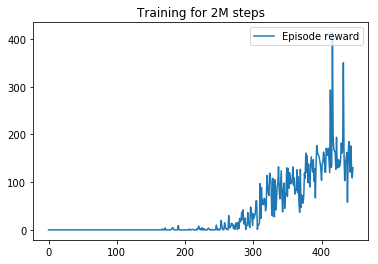

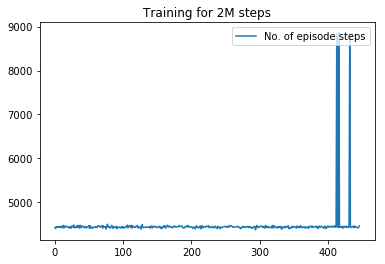

In [12]:
plt.plot(history2M.history['episode_reward'])
plt.title('Training for 2M steps')
plt.legend(['Episode reward'], loc='upper right')
plt.show()

plt.plot(history2M.history['nb_episode_steps'])
plt.title('Training for 2M steps')
plt.legend(['No. of episode steps'], loc='upper right')
plt.show()

#### 1.2 Saving the weights (2M)

In [13]:
dqn.save_weights('dqn_2M.h5f', overwrite=True)

***
### <span style="color:teal"> Re-Training </span>the model (for 1M steps)

#### 2.1 Load Weights

In [14]:
dqn.load_weights('dqn_2M.h5f')

#### 2.2 Compile the DQN Agent with <span style="color:Red">No Exploration</span>

In [15]:
dqn = DQNAgent(model=model, nb_actions=nb_actions, policy=None, memory=memory, processor=GameProcess(),
               gamma=.99, target_model_update=10000, train_interval=4, delta_clip=1.)

dqn.compile(Adam(lr=0.00025), metrics=['mae'])

#### 2.3 Fit for 1M Steps

In [16]:
history3M = dqn.fit(env, nb_steps=1000000)

Training for 1000000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 193s - reward: 0.0314   
2 episodes - episode_reward: 139.000 [107.000, 171.000] - loss: 0.052 - mean_absolute_error: 2.448 - mean_q: 2.553 - ale.lives: 0.000

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 208s - reward: 0.0373   
2 episodes - episode_reward: 162.000 [148.000, 176.000] - loss: 0.052 - mean_absolute_error: 2.507 - mean_q: 2.630 - ale.lives: 0.000

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 208s - reward: 0.0295   
2 episodes - episode_reward: 139.500 [128.000, 151.000] - loss: 0.053 - mean_absolute_error: 2.482 - mean_q: 2.610 - ale.lives: 0.000

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 207s - reward: 0.0329   
3 episodes - episode_reward: 143.333 [134.000, 156.000] - loss: 0.052 - mean_absolute_error: 2.511 - mean_q: 2.640 - ale.lives: 0.000

Inter

10000/10000 [==============================] - 208s - reward: 0.0353   
2 episodes - episode_reward: 158.000 [133.000, 183.000] - loss: 0.062 - mean_absolute_error: 3.534 - mean_q: 3.971 - ale.lives: 0.000

Interval 35 (340000 steps performed)
10000/10000 [==============================] - 208s - reward: 0.0368   
2 episodes - episode_reward: 134.500 [134.000, 135.000] - loss: 0.061 - mean_absolute_error: 3.534 - mean_q: 3.970 - ale.lives: 0.000

Interval 36 (350000 steps performed)
10000/10000 [==============================] - 209s - reward: 0.0286   
3 episodes - episode_reward: 149.667 [123.000, 187.000] - loss: 0.062 - mean_absolute_error: 3.600 - mean_q: 4.045 - ale.lives: 0.000

Interval 37 (360000 steps performed)
10000/10000 [==============================] - 210s - reward: 0.0345   
2 episodes - episode_reward: 168.500 [157.000, 180.000] - loss: 0.067 - mean_absolute_error: 3.596 - mean_q: 4.044 - ale.lives: 0.000

Interval 38 (370000 steps performed)
10000/10000 [===========

10000/10000 [==============================] - 208s - reward: 0.0299   
3 episodes - episode_reward: 154.000 [120.000, 194.000] - loss: 0.065 - mean_absolute_error: 4.399 - mean_q: 4.998 - ale.lives: 0.000

Interval 68 (670000 steps performed)
10000/10000 [==============================] - 210s - reward: 0.0372   
2 episodes - episode_reward: 157.000 [134.000, 180.000] - loss: 0.064 - mean_absolute_error: 4.374 - mean_q: 4.970 - ale.lives: 0.000

Interval 69 (680000 steps performed)
10000/10000 [==============================] - 208s - reward: 0.0315   
2 episodes - episode_reward: 153.000 [139.000, 167.000] - loss: 0.068 - mean_absolute_error: 4.379 - mean_q: 4.981 - ale.lives: 0.000

Interval 70 (690000 steps performed)
10000/10000 [==============================] - 209s - reward: 0.0475   
1 episodes - episode_reward: 182.000 [182.000, 182.000] - loss: 0.066 - mean_absolute_error: 4.385 - mean_q: 4.995 - ale.lives: 0.000

Interval 71 (700000 steps performed)
10000/10000 [===========

10000/10000 [==============================] - 207s - reward: 0.0257   
done, took 20797.656 seconds


#### 2.4 Training History

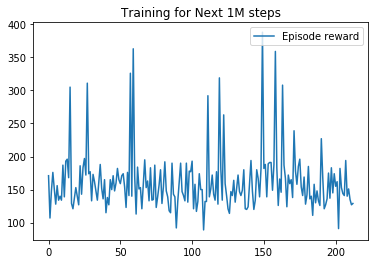

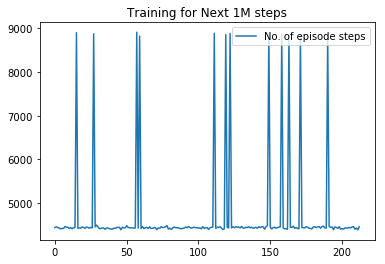

In [17]:
plt.plot(history3M.history['episode_reward'])
plt.title('Training for Next 1M steps')
plt.legend(['Episode reward'], loc='upper right')
plt.show()

plt.plot(history3M.history['nb_episode_steps'])
plt.title('Training for Next 1M steps')
plt.legend(['No. of episode steps'], loc='upper right')
plt.show()

#### 2.5 Saving the weights (3M)

In [18]:
dqn.save_weights('dqn_3M.h5f', overwrite=True)

***
## <span style="color:teal"> Testing the model </span>

#### 1. Resetting the environment for Testing after <span style="color:red">**-  -   2M steps    -  -**</span>

In [27]:
dqn.load_weights('dqn_2M.h5f')

In [28]:
np.random.seed(133)
env.seed(133)
env.reset()
dqn.test(env, nb_episodes=2, visualize=False)

Testing for 2 episodes ...
Episode 1: reward: 176.000, steps: 4441
Episode 2: reward: 183.000, steps: 4412


#### 3. Again Reseting the environment for Testing after  <span style="color:red">**-  -   3M steps    -  -**</span>

In [29]:
dqn.load_weights('dqn_3M.h5f')

In [30]:
np.random.seed(133)
env.seed(133)
env.reset()
dqn.test(env, nb_episodes=2, visualize=False)

Testing for 2 episodes ...
Episode 1: reward: 167.000, steps: 4441
Episode 2: reward: 194.000, steps: 4412


In [ ]:
# Trained on: Intel® Xeon® Processor E5, 2.40 GHz, Nvidia Quadro K4200
# Bhartendu Thakur, Machine Learning & Computing
# https://in.mathworks.com/matlabcentral/profile/authors/10083740-bhartendu?&detail=fileexchange
# https://in.linkedin.com/in/bhartendu-thakur-56bb6285